In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
plr_info=pd.read_csv('E:\\Learning Python\\Machine Learning\\ML FIFA Project\\FIFA22.csv')
plr_info.head()

C:\Users\MARK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

In [3]:
list(plr_info.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [4]:
plr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [5]:
unwanted_cols_1=['sofifa_id','player_url','long_name','player_positions','dob','club_team_id','club_loaned_from',
               'nationality_id','nation_team_id','real_face','player_face_url','club_logo_url','club_flag_url',
               'nation_logo_url','nation_flag_url','nation_jersey_number']

In [6]:
plr_info_1=plr_info.drop(unwanted_cols_1,axis=1)
plr_info_1.dtypes.value_counts()

int64      42
object     39
float64    13
dtype: int64

In [7]:
plr_info_1.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         93   78000000.0  320000.0   34   
1     R. Lewandowski       92         92  119500000.0  270000.0   32   
2  Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3          Neymar Jr       91         91  129000000.0  270000.0   29   
4       K. De Bruyne       91         91  125500000.0  350000.0   30   

   height_cm  weight_kg            club_name             league_name  ...  \
0        170         72  Paris Saint-Germain          French Ligue 1  ...   
1        185         81    FC Bayern München    German 1. Bundesliga  ...   
2        187         83    Manchester United  English Premier League  ...   
3        175         68  Paris Saint-Germain          French Ligue 1  ...   
4        181         70      Manchester City  English Premier League  ...   

    ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0  64+3  64+3  64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3  
1  66+3  66+3  66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3  
2  59+3  59+3  59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3  
3  63+3  63+3  63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3  
4  80+3  80+3  80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3  

[5 rows x 94 columns]

In [8]:
pos=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb',
     'lcb','cb','rcb','rb','gk']
len(pos)

27

In [9]:
plr_info_1.select_dtypes(include=['int64','float64']).columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'league_level', 'club_jersey_number',
       'club_contract_valid_until', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'd

In [10]:
plr_info_1.select_dtypes(exclude=['int64','float64']).columns

Index(['short_name', 'club_name', 'league_name', 'club_position',
       'club_joined', 'nationality_name', 'nation_position', 'preferred_foot',
       'work_rate', 'body_type', 'player_tags', 'player_traits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'],
      dtype='object')

# EDA

## 1. Overall Rating of the Players
1. Maximum number of players have their rating as 65.
2. Also, the number of players with Overall Rating>75 sees a sharp dip.
3. The overall rating of the player is normally distributed.

In [11]:
px.histogram(plr_info_1.overall)

## 2. Age of the Payers
1. The distribution of the age of players is positively skewed.
2. Maximum number of players are 21 years old.

In [14]:
px.histogram(plr_info_1.age)

## 3. Height of the Players
1. The height of the player seems to be normally distributed.
2. Maximum number of players have their height as 180 cm.

In [15]:
px.histogram(plr_info_1.height_cm)

## 4. Top Categories

### a. Most Valuable in Market

In [16]:
plr_mktprice=plr_info_1.sort_values(by='value_eur',ascending=False)
px.bar(x=plr_mktprice[:10].short_name,y=plr_mktprice[0:10].value_eur)

### b. Highest Wages

In [17]:
plr_wages=plr_info_1.sort_values(by='wage_eur',ascending=False)
px.bar(x=plr_wages[:10].short_name,y=plr_wages[0:10].value_eur)

### c. Most Nationalities in the EPL
1. Majority of the players are from Europe.

In [19]:
px.histogram(plr_info_1.nationality_name)

## 5. Age vs Overall 
1. The Overall Rating of the players increases with Age.
2. Experience builds up with time and hence their Overall Rating increases.

Text(0, 0.5, 'Player Overall')

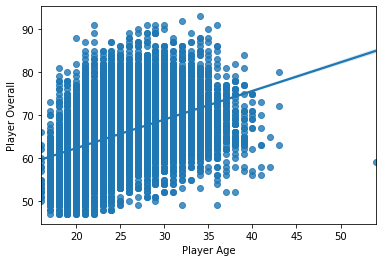

In [20]:
sns.regplot(x=plr_info_1.age,y=plr_info_1.overall)
plt.xlabel('Player Age')
plt.ylabel('Player Overall')

 ## 6. International Reputation of the Players
 1. Only 8% of the players have international reputation >1.

In [21]:
px.histogram(plr_info_1.international_reputation)

## 7. Aggregation based on Feature

### a. Preferred Foot
1. Most of the players are right footed.

In [22]:
px.histogram(plr_info_1.preferred_foot)

### b. Work Rate
1. Medium Work Rate is seen amongst most players. It is understandable as high performance for 90 minutes of every game requires high conditioning which can burn out the player as well.
2. Work rate keeps on switching between High and Medium as per the tempo of the game.

In [23]:
px.histogram(plr_info_1.work_rate)

# Pair Plot

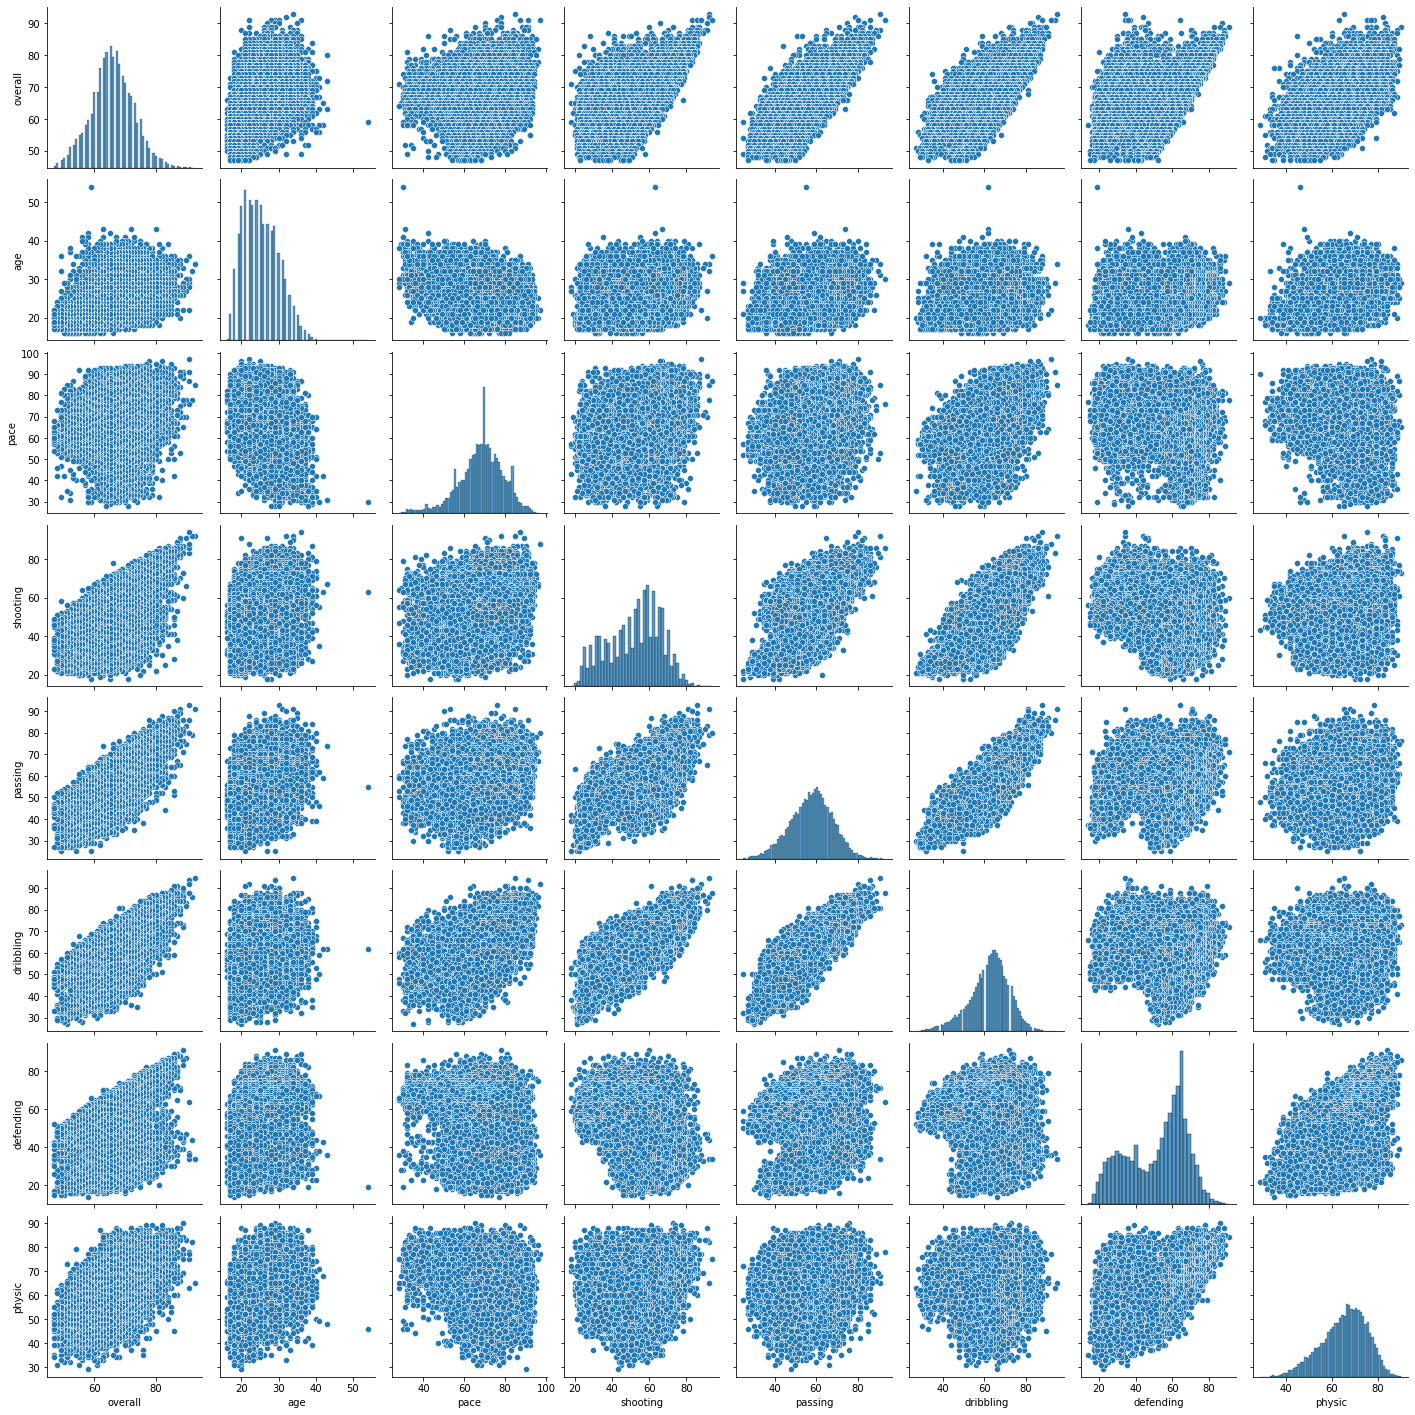

In [24]:
sns.pairplot(plr_info_1,vars=['overall','age','pace',
       'shooting','passing','dribbling','defending','physic'])

# Feature Engineering

In [25]:
for i in range(len(plr_info_1)):
    for j in range(len(pos)):
        val=re.split('[+ -]',plr_info_1.loc[:,pos[j]][i])[0]
        plr_info_1.loc[:,pos[j]][i]=val

<ipython-input-25-b04846d084ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
for i in range(len(pos)):
    plr_info_1[pos[i]]=plr_info_1[pos[i]].astype('int64')

In [27]:
plr_info_1.dtypes.value_counts()

int64      69
float64    13
object     12
dtype: int64

In [28]:
obj=plr_info_1.select_dtypes(exclude=['int64','float64']).columns
plr_info_1[obj].head()

short_name            club_name             league_name  \
0           L. Messi  Paris Saint-Germain          French Ligue 1   
1     R. Lewandowski    FC Bayern München    German 1. Bundesliga   
2  Cristiano Ronaldo    Manchester United  English Premier League   
3          Neymar Jr  Paris Saint-Germain          French Ligue 1   
4       K. De Bruyne      Manchester City  English Premier League   

  club_position club_joined nationality_name nation_position preferred_foot  \
0            RW  2021-08-10        Argentina              RW           Left   
1            ST  2014-07-01           Poland              RS          Right   
2            ST  2021-08-27         Portugal              ST          Right   
3            LW  2017-08-03           Brazil             NaN          Right   
4           RCM  2015-08-30          Belgium             RCM          Right   

     work_rate body_type                                        player_tags  \
0   Medium/Low    Unique  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  High/Medium    Unique  #Aerial Threat, #Distance Shooter, #Clinical F...   
2     High/Low    Unique  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  High/Medium    Unique  #Speedster, #Dribbler, #Playmaker, #FK Special...   
4    High/High    Unique  #Dribbler, #Playmaker, #Engine, #Distance Shoo...   

                                       player_traits  
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  
1  Solid Player, Finesse Shot, Outside Foot Shot,...  
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  
4  Injury Prone, Leadership, Early Crosser, Long ...

In [29]:
plr_info_1.isna().sum().sort_values(ascending=False)[0:21]

nation_position              18480
player_tags                  17798
goalkeeping_speed            17107
player_traits                 9841
pace                          2132
shooting                      2132
dribbling                     2132
defending                     2132
physic                        2132
passing                       2132
release_clause_eur            1176
club_joined                   1163
value_eur                       74
league_level                    61
club_position                   61
league_name                     61
club_contract_valid_until       61
club_name                       61
wage_eur                        61
club_jersey_number              61
lf                               0
dtype: int64

In [30]:
unwanted_cols_2=['club_name','league_name','club_joined','nationality_name','nation_position','player_tags','player_traits',
                 'goalkeeping_speed','club_contract_valid_until','club_jersey_number','league_level']
plr_info_2=plr_info_1.drop(unwanted_cols_2,axis=1)
plr_info_2.dtypes.value_counts()

int64      69
float64     9
object      5
dtype: int64

In [31]:
plr_info_2.isna().sum().sort_values(ascending=False)[0:12]

pace                  2132
physic                2132
defending             2132
dribbling             2132
passing               2132
shooting              2132
release_clause_eur    1176
value_eur               74
wage_eur                61
club_position           61
short_name               0
rw                       0
dtype: int64

# Filling Missing Values

In [152]:
# Numeric Columns- ['shooting','passing','dribbling','defending','physic','pace','release_clause_eur','value_eur','wage_eur']   

In [32]:
def num_fill(df,feature):
    for i in range(len(df)):
        if (df[feature].isna()[i]):
            ovr=df.iloc[i,:]['overall']
            val=df[(df['overall']==ovr)].overall.median()
            df[feature].iloc[i]=val
            
    return (df)

In [35]:
num_fill(plr_info_2,'shooting')
num_fill(plr_info_2,'passing')
num_fill(plr_info_2,'dribbling')
num_fill(plr_info_2,'defending')
num_fill(plr_info_2,'physic')
num_fill(plr_info_2,'pace')
num_fill(plr_info_2,'release_clause_eur')
num_fill(plr_info_2,'value_eur')
num_fill(plr_info_2,'wage_eur')

short_name  overall  potential    value_eur  wage_eur  age  \
0                L. Messi       93         93   78000000.0  320000.0   34   
1          R. Lewandowski       92         92  119500000.0  270000.0   32   
2       Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3               Neymar Jr       91         91  129000000.0  270000.0   29   
4            K. De Bruyne       91         91  125500000.0  350000.0   30   
...                   ...      ...        ...          ...       ...  ...   
19234           Song Defu       47         52      70000.0    1000.0   22   
19235           C. Porter       47         59     110000.0     500.0   19   
19236            N. Logue       47         55     100000.0     500.0   21   
19237           L. Rudden       47         60     110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60     110000.0     500.0   19   

       height_cm  weight_kg club_position preferred_foot  ...  ldm  cdm  rdm  \
0            170         72            RW           Left  ...   64   64   64   
1            185         81            ST          Right  ...   66   66   66   
2            187         83            ST          Right  ...   59   59   59   
3            175         68            LW          Right  ...   63   63   63   
4            181         70           RCM          Right  ...   80   80   80   
...          ...        ...           ...            ...  ...  ...  ...  ...   
19234        180         64           SUB          Right  ...   46   46   46   
19235        175         70           RES          Right  ...   46   46   46   
19236        178         72           RES          Right  ...   46   46   46   
19237        173         66           RES          Right  ...   29   29   29   
19238        167         61           SUB          Right  ...   44   44   44   

      rwb  lb  lcb  cb  rcb  rb  gk  
0      66  61   50  50   50  61  19  
1      64  61   60  60   60  61  19  
2      63  60   53  53   53  60  20  
3      67  62   50  50   50  62  20  
4      79  75   69  69   69  75  21  
...    ..  ..  ...  ..  ...  ..  ..  
19234  48  48   46  46   46  48  15  
19235  49  48   44  44   44  48  14  
19236  47  47   45  45   45  47  12  
19237  33  32   26  26   26  32  15  
19238  45  45   41  41   41  45  16  

[19239 rows x 83 columns]

In [153]:
# Object Column- ['club_position']

In [36]:
def obj_fill(df,feature):
    for i in range(len(df)):
        if (df[feature].isna()[i]):
            ovr=df.iloc[i,:]['overall']
            val=df[(df['overall']==ovr)].overall.mode()
            df[feature].iloc[i]=val
            
    return (df)

In [37]:
obj_fill(plr_info_2,'club_position')

short_name  overall  potential    value_eur  wage_eur  age  \
0                L. Messi       93         93   78000000.0  320000.0   34   
1          R. Lewandowski       92         92  119500000.0  270000.0   32   
2       Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3               Neymar Jr       91         91  129000000.0  270000.0   29   
4            K. De Bruyne       91         91  125500000.0  350000.0   30   
...                   ...      ...        ...          ...       ...  ...   
19234           Song Defu       47         52      70000.0    1000.0   22   
19235           C. Porter       47         59     110000.0     500.0   19   
19236            N. Logue       47         55     100000.0     500.0   21   
19237           L. Rudden       47         60     110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60     110000.0     500.0   19   

       height_cm  weight_kg club_position preferred_foot  ...  ldm  cdm  rdm  \
0            170         72            RW           Left  ...   64   64   64   
1            185         81            ST          Right  ...   66   66   66   
2            187         83            ST          Right  ...   59   59   59   
3            175         68            LW          Right  ...   63   63   63   
4            181         70           RCM          Right  ...   80   80   80   
...          ...        ...           ...            ...  ...  ...  ...  ...   
19234        180         64           SUB          Right  ...   46   46   46   
19235        175         70           RES          Right  ...   46   46   46   
19236        178         72           RES          Right  ...   46   46   46   
19237        173         66           RES          Right  ...   29   29   29   
19238        167         61           SUB          Right  ...   44   44   44   

      rwb  lb  lcb  cb  rcb  rb  gk  
0      66  61   50  50   50  61  19  
1      64  61   60  60   60  61  19  
2      63  60   53  53   53  60  20  
3      67  62   50  50   50  62  20  
4      79  75   69  69   69  75  21  
...    ..  ..  ...  ..  ...  ..  ..  
19234  48  48   46  46   46  48  15  
19235  49  48   44  44   44  48  14  
19236  47  47   45  45   45  47  12  
19237  33  32   26  26   26  32  15  
19238  45  45   41  41   41  45  16  

[19239 rows x 83 columns]

In [38]:
plr_info_2.isna().any().sum()

0

# Attacking Players

In [39]:
plr_info_2['club_position']=plr_info_2['club_position'].astype('str')

In [40]:
attackers=plr_info_2[(plr_info_2['club_position']=='ST') | (plr_info_2['club_position']=='CF') |
                     (plr_info_2['club_position']=='RF') | (plr_info_2['club_position']=='LF') |
                     (plr_info_2['club_position']=='RS') | (plr_info_2['club_position']=='LS') |
                     (plr_info_2['club_position']=='LW') | (plr_info_2['club_position']=='RW')]
attackers.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         93   78000000.0  320000.0   34   
1     R. Lewandowski       92         92  119500000.0  270000.0   32   
2  Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3          Neymar Jr       91         91  129000000.0  270000.0   29   
6          K. Mbappé       91         95  194000000.0  230000.0   22   

   height_cm  weight_kg club_position preferred_foot  ...  ldm  cdm  rdm rwb  \
0        170         72            RW           Left  ...   64   64   64  66   
1        185         81            ST          Right  ...   66   66   66  64   
2        187         83            ST          Right  ...   59   59   59  63   
3        175         68            LW          Right  ...   63   63   63  67   
6        182         73            ST          Right  ...   63   63   63  67   

   lb  lcb  cb  rcb  rb  gk  
0  61   50  50   50  61  19  
1  61   60  60   60  61  19  
2  60   53  53   53  60  20  
3  62   50  50   50  62  20  
6  63   54  54   54  63  18  

[5 rows x 83 columns]

In [41]:
attacking_features=['short_name','overall','potential','age','pace','shooting','passing','dribbling',
                   'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
                   'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing', 
                    'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                    'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina', 
                    'power_strength','power_long_shots','value_eur']
attackers_1=attackers[attacking_features]
attackers_1.head()

short_name  overall  potential  age  pace  shooting  passing  \
0           L. Messi       93         93   34  85.0      92.0     91.0   
1     R. Lewandowski       92         92   32  78.0      92.0     79.0   
2  Cristiano Ronaldo       91         91   36  87.0      94.0     80.0   
3          Neymar Jr       91         91   29  91.0      83.0     86.0   
6          K. Mbappé       91         95   22  97.0      88.0     80.0   

   dribbling  attacking_crossing  attacking_finishing  ...  \
0       95.0                  85                   95  ...   
1       86.0                  71                   95  ...   
2       88.0                  87                   95  ...   
3       94.0                  85                   83  ...   
6       92.0                  78                   93  ...   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
6                     97                92                  93   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                82                90             85             76   
2                74                94             95             77   
3                84                80             64             81   
6                83                86             78             88   

   power_strength  power_long_shots    value_eur  
0              69                94   78000000.0  
1              86                87  119500000.0  
2              77                93   45000000.0  
3              53                81  129000000.0  
6              77                82  194000000.0  

[5 rows x 29 columns]

In [42]:
attackers_1.dtypes.value_counts()

int64      23
float64     5
object      1
dtype: int64

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
scale=StandardScaler()
attack_num=scale.fit_transform(attackers_1.drop(['short_name'],axis=1))

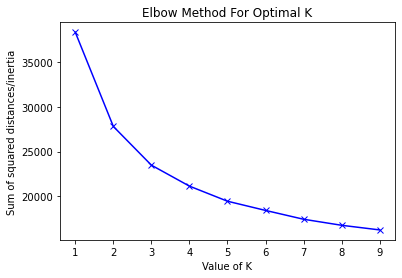

In [48]:
sse=[]
K=range(1,10)

for i in K:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(attack_num)
    sse.append(kmeans.inertia_)
    
plt.plot(K,sse,'bx-')
plt.xlabel('Value of K') 
plt.ylabel('Sum of squared distances/inertia') 
plt.title('Elbow Method For Optimal K')
plt.show()

In [49]:
att_model=KMeans(n_clusters=5)
att_cluster=att_model.fit_predict(attack_num)
att_cluster

array([1, 1, 1, ..., 3, 3, 3])

In [50]:
attackers_1['Cluster']=att_cluster
attackers_1.head()

short_name  overall  potential  age  pace  shooting  passing  \
0           L. Messi       93         93   34  85.0      92.0     91.0   
1     R. Lewandowski       92         92   32  78.0      92.0     79.0   
2  Cristiano Ronaldo       91         91   36  87.0      94.0     80.0   
3          Neymar Jr       91         91   29  91.0      83.0     86.0   
6          K. Mbappé       91         95   22  97.0      88.0     80.0   

   dribbling  attacking_crossing  attacking_finishing  ...  movement_agility  \
0       95.0                  85                   95  ...                91   
1       86.0                  71                   95  ...                77   
2       88.0                  87                   95  ...                86   
3       94.0                  85                   83  ...                96   
6       92.0                  78                   93  ...                92   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  93                82                90             85   
2                  94                74                94             95   
3                  89                84                80             64   
6                  93                83                86             78   

   power_stamina  power_strength  power_long_shots    value_eur  Cluster  
0             72              69                94   78000000.0        1  
1             76              86                87  119500000.0        1  
2             77              77                93   45000000.0        1  
3             81              53                81  129000000.0        1  
6             88              77                82  194000000.0        1  

[5 rows x 30 columns]

In [51]:
px.scatter_3d(x=attackers_1['age'],y=attackers_1['overall'],z=attackers_1['value_eur'],color=attackers_1['Cluster'],
              hover_name=attackers_1['short_name'])

## Potential Attacking Targets

## Cluster 0- Attacking Rating 5/5

In [52]:
attackers_1[(attackers_1['Cluster']==0)].sort_values(by=['age','potential','overall'])[0:5]

short_name  overall  potential  age  pace  shooting  passing  \
7430        Iván Azón       68         82   18  63.0      68.0     52.0   
6342         E. Touré       69         80   19  73.0      70.0     54.0   
2886  Rodolfo Pittaça       73         73   21  51.0      75.0     68.0   
6210      T. Badaloni       69         78   21  60.0      69.0     51.0   
6177       M. Retegui       69         77   22  61.0      68.0     52.0   

      dribbling  attacking_crossing  attacking_finishing  ...  \
7430       63.0                  35                   70  ...   
6342       68.0                  44                   74  ...   
2886       64.0                  69                   75  ...   
6210       62.0                  44                   68  ...   
6177       65.0                  36                   70  ...   

      movement_agility  movement_reactions  movement_balance  \
7430                52                  60                71   
6342                68                  64                65   
2886                50                  73                60   
6210                58                  68                53   
6177                54                  70                52   

      power_shot_power  power_jumping  power_stamina  power_strength  \
7430                68             71             80              85   
6342                73             65             64              73   
2886                80             85             73              84   
6210                77             77             62              80   
6177                68             76             61              82   

      power_long_shots  value_eur  Cluster  
7430                63  2800000.0        0  
6342                63  3000000.0        0  
2886                69  3600000.0        0  
6210                67  3200000.0        0  
6177                66  3200000.0        0  

[5 rows x 30 columns]

## Cluster 1- Attacking Rating 4/5

In [53]:
attackers_1[(attackers_1['Cluster']==1)].sort_values(by=['age','potential','overall'])[0:5]

short_name  overall  potential  age  pace  shooting  passing  \
29           E. Haaland       88         93   20  89.0      91.0     65.0   
630   Luimo Boas Santos       79         79   21  83.0      79.0     65.0   
1446            Trincão       76         85   21  79.0      71.0     70.0   
841           A. Gouiri       78         85   21  79.0      80.0     75.0   
848            J. David       78         86   21  85.0      76.0     71.0   

      dribbling  attacking_crossing  attacking_finishing  ...  \
29         80.0                  47                   94  ...   
630        81.0                  42                   81  ...   
1446       81.0                  68                   69  ...   
841        79.0                  76                   81  ...   
848        78.0                  67                   80  ...   

      movement_agility  movement_reactions  movement_balance  \
29                  75                  88                72   
630                 82                  85                73   
1446                84                  79                65   
841                 77                  77                73   
848                 77                  74                71   

      power_shot_power  power_jumping  power_stamina  power_strength  \
29                  94             74             82              93   
630                 75             87             79              63   
1446                73             63             77              71   
841                 78             70             74              72   
848                 75             86             85              75   

      power_long_shots    value_eur  Cluster  
29                  87  137500000.0        1  
630                 82   21000000.0        1  
1446                73   17000000.0        1  
841                 79   29000000.0        1  
848                 70   32000000.0        1  

[5 rows x 30 columns]

## Cluster 2- Attacking Rating 3/5

In [54]:
attackers_1[(attackers_1['Cluster']==2)].sort_values(by=['age','potential','overall'])[0:5]

short_name  overall  potential  age  pace  shooting  passing  \
15802         Y. Amyn       60         74   17  76.0      49.0     51.0   
15455    T. Gulliksen       60         77   17  67.0      53.0     57.0   
14884       J. Enciso       61         81   17  68.0      55.0     53.0   
9686           M. Cho       66         82   17  75.0      66.0     53.0   
10992  A. Schjelderup       65         84   17  72.0      58.0     60.0   

       dribbling  attacking_crossing  attacking_finishing  ...  \
15802       68.0                  45                   47  ...   
15455       64.0                  51                   55  ...   
14884       63.0                  61                   57  ...   
9686        68.0                  55                   68  ...   
10992       68.0                  52                   60  ...   

       movement_agility  movement_reactions  movement_balance  \
15802                89                  60                90   
15455                85                  57                79   
14884                62                  50                56   
9686                 60                  58                59   
10992                82                  63                87   

       power_shot_power  power_jumping  power_stamina  power_strength  \
15802                57             70             57              32   
15455                55             61             70              39   
14884                49             49             52              42   
9686                 68             62             47              58   
10992                58             51             59              40   

       power_long_shots  value_eur  Cluster  
15802                46   550000.0        2  
15455                50   600000.0        2  
14884                57   900000.0        2  
9686                 65  2100000.0        2  
10992                53  1800000.0        2  

[5 rows x 30 columns]

## Cluster 3- Attacking Rating 2/5

In [55]:
attackers_1[(attackers_1['Cluster']==3)].sort_values(by=['age','potential','overall'])[0:5]

short_name  overall  potential  age  pace  shooting  passing  \
16868   T. Bloxham       58         72   17  72.0      55.0     45.0   
17321  P. Zaragoza       57         71   18  67.0      53.0     43.0   
15889    T. Çukur       60         75   18  58.0      60.0     50.0   
10765      R. Pepi       65         80   18  62.0      65.0     49.0   
11023  Karrikaburu       65         84   18  65.0      65.0     47.0   

       dribbling  attacking_crossing  attacking_finishing  ...  \
16868       54.0                  48                   57  ...   
17321       57.0                  31                   55  ...   
15889       57.0                  39                   59  ...   
10765       61.0                  25                   70  ...   
11023       63.0                  38                   70  ...   

       movement_agility  movement_reactions  movement_balance  \
16868                52                  55                42   
17321                55                  62                68   
15889                45                  56                32   
10765                62                  68                56   
11023                62                  60                65   

       power_shot_power  power_jumping  power_stamina  power_strength  \
16868                55             51             67              74   
17321                51             60             55              56   
15889                66             48             59              84   
10765                68             62             70              63   
11023                63             60             51              57   

       power_long_shots  value_eur  Cluster  
16868                50   475000.0        3  
17321                52   375000.0        3  
15889                56   575000.0        3  
10765                50  1700000.0        3  
11023                56  1800000.0        3  

[5 rows x 30 columns]

## Cluster 4- Attacking Rating 1/5

In [56]:
attackers_1[(attackers_1['Cluster']==4)].sort_values(by=['age','potential','overall'])[0:5]

short_name  overall  potential  age  pace  shooting  passing  \
3807    F. Farías       72         84   18  82.0      71.0     66.0   
1450    A. Hložek       76         87   18  78.0      75.0     71.0   
4547   K. Adeyemi       71         85   19  92.0      72.0     65.0   
4499  J. Burkardt       71         81   20  79.0      68.0     61.0   
3771    L. Traoré       72         82   20  77.0      70.0     57.0   

      dribbling  attacking_crossing  attacking_finishing  ...  \
3807       76.0                  66                   72  ...   
1450       76.0                  69                   75  ...   
4547       76.0                  62                   74  ...   
4499       75.0                  55                   69  ...   
3771       69.0                  47                   73  ...   

      movement_agility  movement_reactions  movement_balance  \
3807                88                  71                89   
1450                69                  76                78   
4547                88                  67                81   
4499                74                  70                69   
3771                68                  69                67   

      power_shot_power  power_jumping  power_stamina  power_strength  \
3807                73             61             61              69   
1450                78             70             76              82   
4547                70             88             69              62   
4499                71             75             68              68   
3771                76             84             73              84   

      power_long_shots   value_eur  Cluster  
3807                68   5500000.0        4  
1450                73  16000000.0        4  
4547                71   4500000.0        4  
4499                64   4100000.0        4  
3771                62   5000000.0        4  

[5 rows x 30 columns]